In [120]:
# Agrupa arquivos com base principal

In [2]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\johns\AppData\Local\Temp\pip-install-b2a958j6\sklearn_b8449aaa29bc44a6864e3b633b910fcb\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
    File "C:\Users\johns\AppData\Local\Programs\Python\Python310\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned a

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [6]:
#identifica o caminho relativo da pasta de bases
#os.path.relpath('C:\\Users\\HP ProBook 640\\source\\repos\\TCC\\Bases\\ClimaPortugal', 'C:\\Users\\HP ProBook 640\\source\\repos\\TCC\\src\\Notebooks')
base_dir = '..\\..\\Bases\\Imoveis\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases\\Imoveis'

In [3]:
path = base_dir +'Fato\\'
dir_list = [x for x in os.listdir(path) if '.csv' in x]

In [4]:
lst_dfs = []
for file in dir_list:
    df = pd.read_csv(path+file, sep=';')
    distrito = file.replace('.csv', '')
    df['distrito'] = distrito
    lst_dfs.append(df)
df_fato = pd.concat(lst_dfs)



In [5]:
#Remove o T para trasnformar em numerico o campo de tipo
df_fato['QtdQuartos'] = df_fato['tipo'].apply(lambda x: str(x).replace('T',''))

In [6]:
#adiciona zero nos lugares onde não tem andar nem elevador
df_fato["andar"].replace({np.nan: "0"}, inplace=True)
df_fato["elevador"].replace({np.nan: "0"}, inplace=True)

In [7]:
# A Coluna PrecoDesconto tem muitos valores nulos, irei remove-la da base
df_fato.drop("PrecoDesconto",axis=1,inplace=True)
df_fato.drop("Page",axis=1,inplace=True)

In [8]:
def multply(x,y):
    if x < 175:
        return x*y
    else:
        return x
    
# corrige preços errados
df_fato['Preco'] = df_fato['Preco'].apply(lambda x: multply(x,1000))

In [9]:
# Verifica dados duplicados
ids = df_fato["IdImovel"]
df_fato[ids.isin(ids[ids.duplicated()])].sort_values("IdImovel")

,IdImovel,UrlPesquisa,Url,Nome,Preco,tipo,metros,andar,elevador,Detalhes,Status,distrito,QtdQuartos


In [10]:
df_fato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10729 entries, 0 to 46
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IdImovel     10729 non-null  int64  
 1   UrlPesquisa  10729 non-null  object 
 2   Url          10729 non-null  object 
 3   Nome         10729 non-null  object 
 4   Preco        10729 non-null  float64
 5   tipo         10729 non-null  object 
 6   metros       10729 non-null  float64
 7   andar        10729 non-null  object 
 8   elevador     10729 non-null  object 
 9   Detalhes     10729 non-null  object 
 10  Status       10729 non-null  object 
 11  distrito     10729 non-null  object 
 12  QtdQuartos   10729 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [11]:
print(df_fato.isnull().sum())

IdImovel       0
UrlPesquisa    0
Url            0
Nome           0
Preco          0
tipo           0
metros         0
andar          0
elevador       0
Detalhes       0
Status         0
distrito       0
QtdQuartos     0
dtype: int64


In [12]:
# Remove outliers
def remove_outliers(df,col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IIQ = Q3-Q1
    limite_inferior = Q1-1.5*IIQ
    limite_superior = Q3+1.5*IIQ
    df_out = df.loc[(df[col_name] > limite_inferior) & (df[col_name] < limite_superior)]
    return df_out

In [13]:
# Remove outliers por distrito

lst_distritos = list(df_fato['distrito'].drop_duplicates())

lst_dfs2 = []
for distrito in lst_distritos:
    print(distrito)
    df_dist = (
        df_fato
        .query('distrito == @distrito')
    )
    df_out = remove_outliers(df_dist,'Preco')
    print('--- {},{}'.format(len(df_fato_out.index), len(df_fato.index)))
    lst_dfs2.append(df_out)
df_fato_out = pd.concat(lst_dfs2)



aveiro-distrito


NameError: name 'df_fato_out' is not defined

In [17]:
# Feature engineering

# Criar campo de preço por metro quadrado

df_fato['Preco_Metro'] = df_fato['Preco']/df_fato['metros']

In [18]:
df_fato

,IdImovel,UrlPesquisa,Url,Nome,Preco,tipo,metros,andar,elevador,Detalhes,Status,distrito,QtdQuartos,Preco_Metro
0,30365582,https://www.idealista.pt/arrendar-casas/aveiro...,/imovel/30365582/,"Apartamento T0 na rua Manuel Lopes Conde, 1, O...",400.0,T0,50.0,0.0,sem elevador,"T0 , 50 m² construídos, Rés do chão sem elevador",OK,aveiro-distrito,0,8.000000
1,31533249,https://www.idealista.pt/arrendar-casas/aveiro...,/imovel/31533249/,"Apartamento T3 na avenida Fernandes Lavrador, ...",600.0,T3,100.0,2.0,com elevador,"T3 , 100 m² construídos, 2º andar com elevador",OK,aveiro-distrito,3,6.000000
2,31492152,https://www.idealista.pt/arrendar-casas/aveiro...,/imovel/31492152/,"Apartamento T2 na rua Doutor Mário Sacramento,...",750.0,T2,92.0,8.0,com elevador,"T2 , 92 m² construídos, 8º andar com elevador",OK,aveiro-distrito,2,8.152174
3,31485513,https://www.idealista.pt/arrendar-casas/aveiro...,/imovel/31485513/,"Moradia geminada na avenida João Corte Real, 1...",650.0,T1,70.0,0,0,"T1 , 70 m² construídos",OK,aveiro-distrito,1,9.285714
4,29120236,https://www.idealista.pt/arrendar-casas/aveiro...,/imovel/29120236/,"Apartamento T0 na rua Central, 375, Paramos, E...",500.0,T0,30.0,1.0,sem elevador,"T0 , 30 m² construídos, 1º andar sem elevador",OK,aveiro-distrito,0,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,31516580,https://www.idealista.pt/arrendar-casas/viseu-...,/imovel/31516580/,Apartamento T1 em São Pedro do Sul - Várzea - ...,380.0,T1,53.0,0,0,"T1 , 53 m² construídos",OK,viseu-distrito,1,7.169811
43,31460694,https://www.idealista.pt/arrendar-casas/viseu-...,/imovel/31460694/,"Moradia na rua Doutor Manuel de Arriaga, Guard...",275.0,T3,158.0,0,0,"T3 , 158 m² construídos",OK,viseu-distrito,3,1.740506
44,31563383,https://www.idealista.pt/arrendar-casas/viseu-...,/imovel/31563383/,"Moradia independente em Ventosa, Vouzela",400.0,T3,81.0,0,0,"T3 , 81 m² construídos",OK,viseu-distrito,3,4.938272
45,29447951,https://www.idealista.pt/arrendar-casas/viseu-...,/imovel/29447951/,"Apartamento T1 em Centro, Viseu",400.0,T1,90.0,0,sem elevador,"T1 , 90 m² construídos, sem elevador, 18 nov",OK,viseu-distrito,1,4.444444


In [163]:

dir = 'C:\\Users\\HP ProBook 640\\Desktop\\TCC\\Notebooks\\Bases\\Imoveis\\fato\\'
file_name = "{}{}{}".format(dir,'Base_fato_unificada',".csv")
df_fato_out.to_csv(file_name, sep=';', quotechar='"', decimal=',')

(9867, 10729)

In [155]:
import seaborn as sns


<AxesSubplot:xlabel='Preco'>

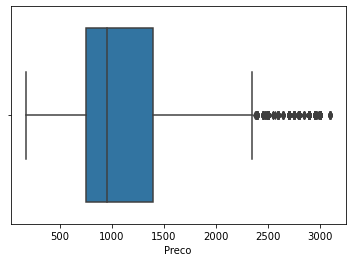

In [165]:
sns.boxplot(x=df_fato_out['Preco'])

<AxesSubplot:title={'center':'Preco'}, xlabel='[distrito]'>

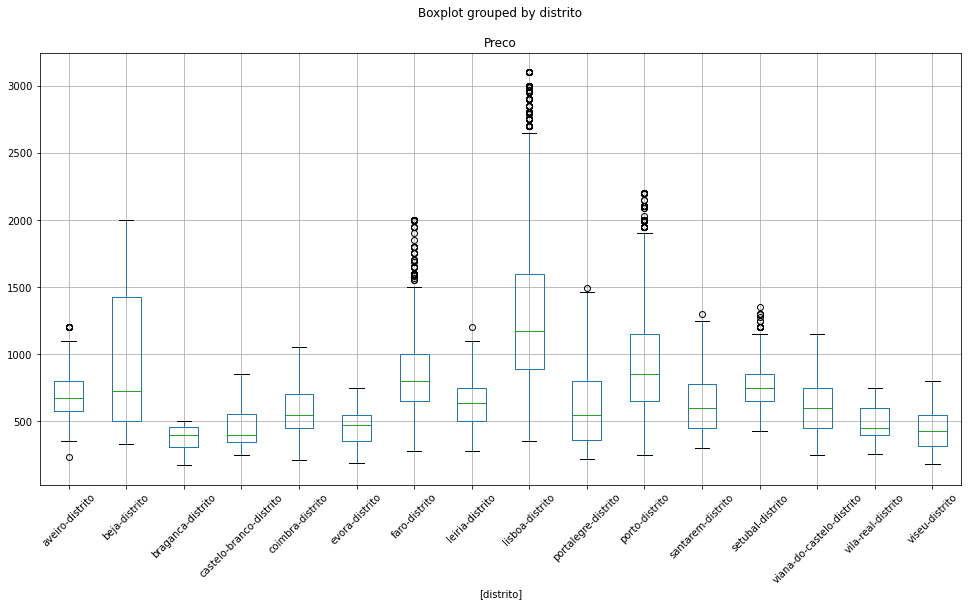

In [186]:
df_fato_out.boxplot(['Preco'], by=['distrito'],figsize=(16,8),rot=45)

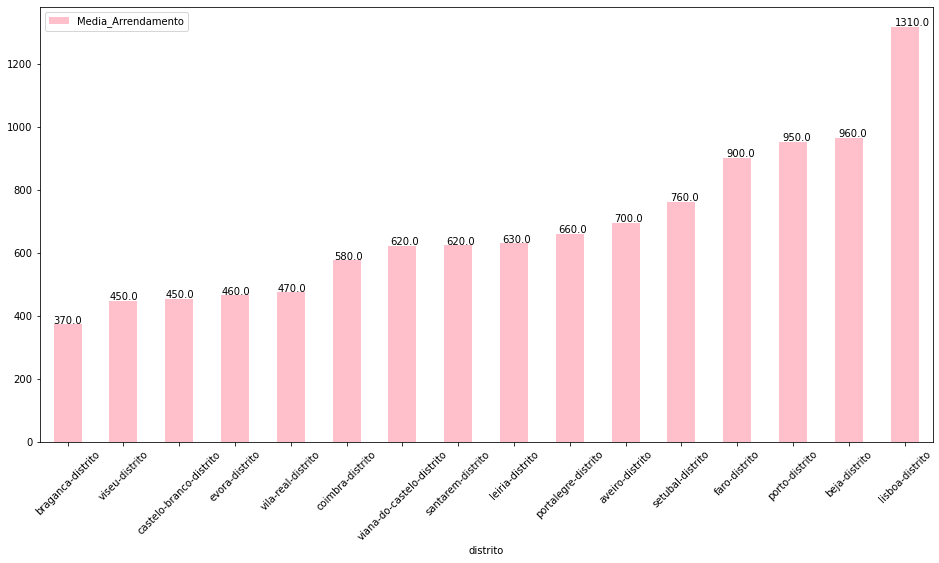

In [210]:
# Media dos arrendamentos por distrito
ax = (
    df_fato_out
    .groupby(['distrito'])
    .agg(Media_Arrendamento = ('Preco','mean'))
    .sort_values("Media_Arrendamento", ascending=True)
).plot(kind='bar', rot=45, color='pink', figsize=(16,8),legend=True)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),-1)), (p.get_x() * 1.005, p.get_height() * 1.005))

(1638, 1781)